In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
loan_data = pd.read_csv("../b. Datasets/Loan Data.csv")

In [3]:
display(loan_data.head(2))
display(loan_data.tail(2))

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
612,LP002984,0.0,1.0,0.666667,1.0,0.0,0.091936,0.0,0.257598,0.74359,1.0,1.0,1.0
613,LP002990,1.0,0.0,0.000000,1.0,1.0,0.054830,0.0,0.179450,0.74359,0.0,0.5,0.0


In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    float64
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    float64
 12  Loan_Status        614 non-null    float64
dtypes: float64(12), object(1)
memory usage: 62.5+ KB


In [5]:
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,614.0,0.182410,0.386497,0.0,0.000000,0.000000,0.000000,1.0
Married,614.0,0.653094,0.476373,0.0,0.000000,1.000000,1.000000,1.0
Dependents,614.0,0.248100,0.336541,0.0,0.000000,0.000000,0.333333,1.0
Education,614.0,0.781759,0.413389,0.0,1.000000,1.000000,1.000000,1.0
Self_Employed,614.0,0.133550,0.340446,0.0,0.000000,0.000000,0.000000,1.0
ApplicantIncome,614.0,0.064978,0.075560,0.0,0.033735,0.045300,0.069821,1.0
CoapplicantIncome,614.0,0.038910,0.070229,0.0,0.000000,0.028524,0.055134,1.0
LoanAmount,614.0,0.198860,0.121617,0.0,0.132055,0.173661,0.225398,1.0
Loan_Amount_Term,614.0,0.706005,0.137668,0.0,0.743590,0.743590,0.743590,1.0
Credit_History,614.0,0.855049,0.352339,0.0,1.000000,1.000000,1.000000,1.0


In [6]:
loan_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
loan_data.select_dtypes(include='number').std()

Gender               0.386497
Married              0.476373
Dependents           0.336541
Education            0.413389
Self_Employed        0.340446
ApplicantIncome      0.075560
CoapplicantIncome    0.070229
LoanAmount           0.121617
Loan_Amount_Term     0.137668
Credit_History       0.352339
Property_Area        0.393741
Loan_Status          0.463973
dtype: float64

In [8]:
loan_data['Loan_ID'].nunique()

614

In [9]:
loan_data.shape

(614, 13)

In [10]:
print("Removing the load id since its all unique values.")
loan_data.drop(labels='Loan_ID', axis=1, inplace=True)

Removing the load id since its all unique values.


In [11]:
loan_data.shape

(614, 12)

In [12]:
X = loan_data.drop(labels='Loan_Status', axis=1)
y = loan_data['Loan_Status']

In [13]:
X.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0
1,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0


In [14]:
y.head(2)

0    1.0
1    0.0
Name: Loan_Status, dtype: float64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    shuffle=True, 
                                                    stratify=loan_data['Loan_Status'], 
                                                    random_state=0)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((491, 11), (123, 11), (491,), (123,))

In [17]:
input_neurons = X_train.shape[1]
print(f"Input layer neurons: {input_neurons} since that is the number of independent features in your dataset.")
output_neurons = 1
print(f"\nOutput layer neurons: {output_neurons}. Since we're performing a binary classification, omly a single neuron.")

print("\nSince the number of hidden layers and number of neurons in the hidden layers are hyperparameters, we can choose it at will.")
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5
print(f"Number of hidden layers: {number_of_hidden_layers}")
print(f"Number of number of neurons in the first hidden layers: {neuron_hidden_layer_1}")
print(f"Number of number of neurons in the second hidden layers: {neuron_hidden_layer_2}")

Input layer neurons: 11 since that is the number of independent features in your dataset.

Output layer neurons: 1. Since we're performing a binary classification, omly a single neuron.

Since the number of hidden layers and number of neurons in the hidden layers are hyperparameters, we can choose it at will.
Number of hidden layers: 2
Number of number of neurons in the first hidden layers: 10
Number of number of neurons in the second hidden layers: 5


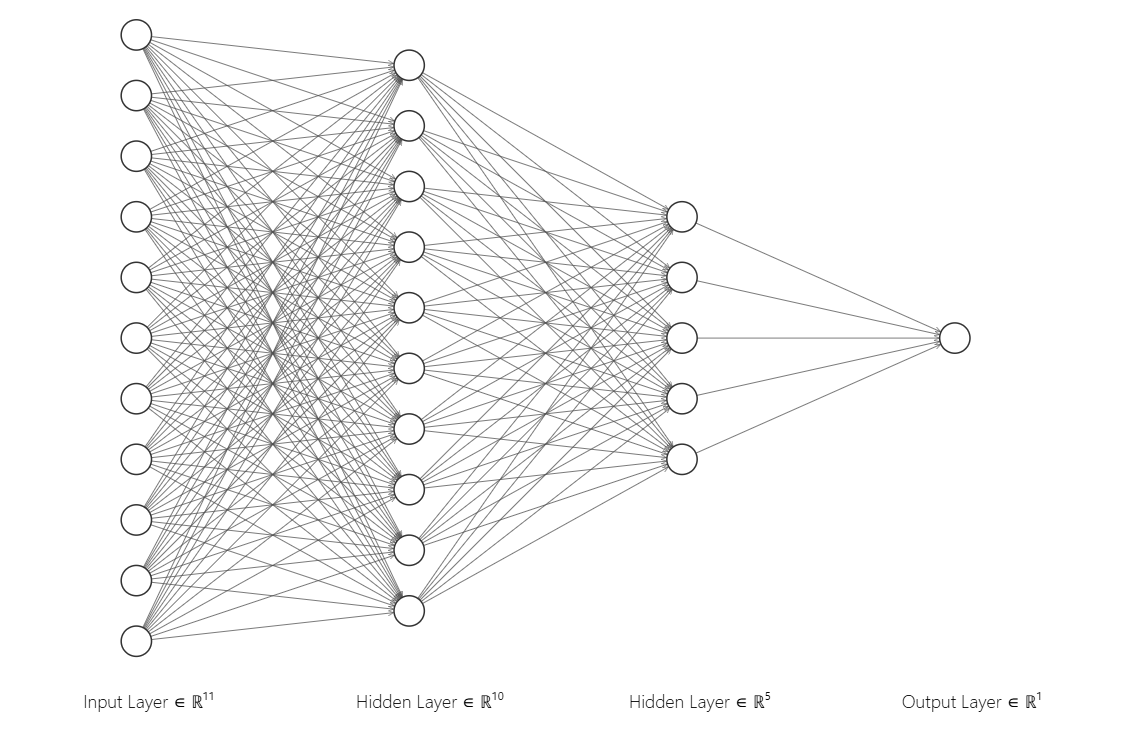

In [18]:
model = Sequential([
    Input(shape=(input_neurons, )),
    Dense(units=neuron_hidden_layer_1, activation='relu'),
    Dense(units=neuron_hidden_layer_2, activation='relu'),
    Dense(units=output_neurons, activation='sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
print("To understand how the number of parameters are obtained, we perform the following calculations")
print("Number of Weights = Number of input layer neurons * Number of hidden layer nuerons:", input_neurons*neuron_hidden_layer_1)
print("Number of biases = Number of neurons in hidden layer:", neuron_hidden_layer_1)
print("Total number of parameters - Input layer to hidden layer 1:", input_neurons*neuron_hidden_layer_1 + neuron_hidden_layer_1)

To understand how the number of parameters are obtained, we perform the following calculations
Number of Weights = Number of input layer neurons * Number of hidden layer nuerons: 110
Number of biases = Number of neurons in hidden layer: 10
Total number of parameters - Input layer to hidden layer 1: 120


In [20]:
print("Using the Adam optimiser with values for learning rate and weight decay.")
print("Further, we're using binary cross entropy as a loss since we're performing binary classification.")
adam_optimiser = Adam(learning_rate=1e-3, weight_decay=1e-4)
model.compile(loss='binary_crossentropy', optimizer=adam_optimiser, metrics=['accuracy'])

Using the Adam optimiser with values for learning rate and weight decay.
Further, we're using binary cross entropy as a loss since we're performing binary classification.


In [21]:
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4621 - loss: 0.7004 - val_accuracy: 0.5447 - val_loss: 0.6942
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6236 - loss: 0.6758 - val_accuracy: 0.6260 - val_loss: 0.6696
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7222 - loss: 0.6479 - val_accuracy: 0.7154 - val_loss: 0.6434
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7193 - loss: 0.6267 - val_accuracy: 0.7236 - val_loss: 0.6204
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7333 - loss: 0.6101 - val_accuracy: 0.7236 - val_loss: 0.6036
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7507 - loss: 0.5773 - val_accuracy: 0.7317 - val_loss: 0.5926
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7142 - loss: 0.5895 - val_accuracy: 0.7317 - val_loss: 0.5844
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7342 - loss: 0.5673 - val_accuracy: 0.7317 - val_loss

In [22]:
prediction = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [23]:
prediction = np.where(prediction > 0.5, 1, 0)

In [24]:
accuracy_score(y_test, prediction)

0.8048780487804879

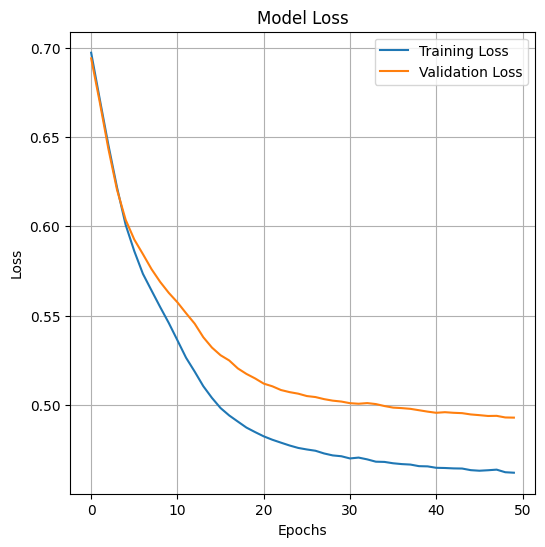

In [25]:
plt.figure(figsize=(6, 6))
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid()
plt.show()

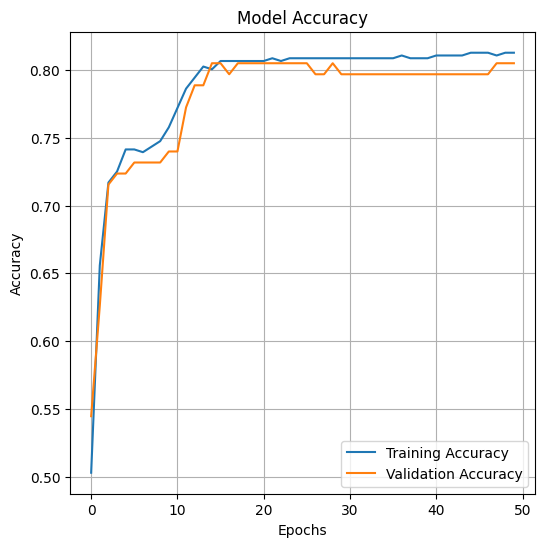

In [26]:
plt.figure(figsize=(6, 6))
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()